# Ensemble Learning

 They combine the decisions from multiple models to improve the overall performance. This can be achieved in various ways, which you will discover in this article.

Ensemble learning is a machine learning technique that enhances accuracy and resilience in forecasting by merging predictions from multiple models. It aims to mitigate errors or biases that may exist in individual models by leveraging the collective intelligence of the ensemble.  By effectively merging predictions from multiple models, ensemble learning has proven to be a powerful tool in various domains, offering more robust and reliable forecasts.

With these examples, you can infer that a diverse group of people are likely to make better decisions as compared to individuals. Similar is true for a diverse set of models in comparison to single models. This diversification in Machine Learning is achieved by a technique called Ensemble Learning.

## Simple Ensemble Techniques

# 1. Max Voting

The max voting method is generally used for classification problems. In this technique, multiple models are used to make predictions for each data point. The predictions by each model are considered as a ‘vote’. The predictions which we get from the majority of the models are used as the final prediction.

In [6]:
# IMPORTS
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import statistics as st
import warnings
warnings.filterwarnings('ignore')

# SPLITTING THE DATASET
df = pd.read_csv('heart.csv')
x = df.drop('target', axis = 1)
y = df['target']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# MODELS CREATION
model1 = DecisionTreeClassifier()
model2 = KNeighborsClassifier()
model3= LogisticRegression()

model1.fit(x_train,y_train)
model2.fit(x_train,y_train)
model3.fit(x_train,y_train)

# PREDICTION
pred1=model1.predict(x_test)
pred2=model2.predict(x_test)
pred3=model3.predict(x_test)

# FINAL_PREDICTION
final_pred = np.array([])
for i in range(0,len(x_test)):
    final_pred = np.append(final_pred, st.mode([pred1[i], pred2[i], pred3[i]]))
print(final_pred)

EmptyDataError: No columns to parse from file

In [4]:
from sklearn.ensemble import VotingClassifier
model1 = LogisticRegression(random_state=1)
model2 = DecisionTreeClassifier(random_state=1)
model = VotingClassifier(estimators=[('lr', model1), ('dt', model2)], voting='hard')
model.fit(x_train,y_train)
model.score(x_test,y_test)


NameError: name 'x_train' is not defined

## 2. Averaging

Similar to the max voting technique, multiple predictions are made for each data point in averaging. In this method, we take an average of predictions from all the models and use it to make the final prediction. Averaging can be used for making predictions in regression problems or while calculating probabilities for classification problems

In [ ]:
model1 = tree.DecisionTreeClassifier()
model2 = KNeighborsClassifier()
model3= LogisticRegression()

model1.fit(x_train,y_train)
model2.fit(x_train,y_train)
model3.fit(x_train,y_train)

pred1=model1.predict_proba(x_test)
pred2=model2.predict_proba(x_test)
pred3=model3.predict_proba(x_test)

finalpred=(pred1+pred2+pred3)/3

## 3. Weighted Average

This is an extension of the averaging method. All models are assigned different weights defining the importance of each model for prediction. For instance, if two of your colleagues are critics, while others have no prior experience in this field, then the answers by these two friends are given more importance as compared to the other people.

In [ ]:
model1 = tree.DecisionTreeClassifier()
model2 = KNeighborsClassifier()
model3= LogisticRegression()

model1.fit(x_train,y_train)
model2.fit(x_train,y_train)
model3.fit(x_train,y_train)

pred1=model1.predict_proba(x_test)
pred2=model2.predict_proba(x_test)
pred3=model3.predict_proba(x_test)

finalpred=(pred1*0.3+pred2*0.3+pred3*0.4)

# Advanced Ensemble techniques


In [ ]:
def Stacking(model,train,y,test,n_fold):
   folds=StratifiedKFold(n_splits=n_fold,random_state=1)
   test_pred=np.empty((test.shape[0],1),float)
   train_pred=np.empty((0,1),float)
   for train_indices,val_indices in folds.split(train,y.values):
      x_train,x_val=train.iloc[train_indices],train.iloc[val_indices]
      y_train,y_val=y.iloc[train_indices],y.iloc[val_indices]

      model.fit(X=x_train,y=y_train)
      train_pred=np.append(train_pred,model.predict(x_val))
      test_pred=np.append(test_pred,model.predict(test))
    return test_pred.reshape(-1,1),train_pred


In [ ]:
model1 = tree.DecisionTreeClassifier(random_state=1)

test_pred1 ,train_pred1=Stacking(model=model1,n_fold=10, train=x_train,test=x_test,y=y_train)

train_pred1=pd.DataFrame(train_pred1)
test_pred1=pd.DataFrame(test_pred1)

In [ ]:
model2 = KNeighborsClassifier()

test_pred2 ,train_pred2=Stacking(model=model2,n_fold=10,train=x_train,test=x_test,y=y_train)

train_pred2=pd.DataFrame(train_pred2)
test_pred2=pd.DataFrame(test_pred2)

In [ ]:
df = pd.concat([train_pred1, train_pred2], axis=1)
df_test = pd.concat([test_pred1, test_pred2], axis=1)

model = LogisticRegression(random_state=1)
model.fit(df,y_train)
model.score(df_test, y_test)

# Blending

In [ ]:
model1 = tree.DecisionTreeClassifier()
model1.fit(x_train, y_train)
val_pred1=model1.predict(x_val)
test_pred1=model1.predict(x_test)
val_pred1=pd.DataFrame(val_pred1)
test_pred1=pd.DataFrame(test_pred1)

model2 = KNeighborsClassifier()
model2.fit(x_train,y_train)
val_pred2=model2.predict(x_val)
test_pred2=model2.predict(x_test)
val_pred2=pd.DataFrame(val_pred2)
test_pred2=pd.DataFrame(test_pred2)

In [ ]:
df_val=pd.concat([x_val, val_pred1,val_pred2],axis=1)
df_test=pd.concat([x_test, test_pred1,test_pred2],axis=1)

model = LogisticRegression()
model.fit(df_val,y_val)
model.score(df_test,y_test)

# Bagging


The idea behind bagging is combining the results of multiple models (for instance, all decision trees) to get a generalized result. Here’s a question: If you create all the models on the same set of data and combine it, will it be useful? There is a high chance that these models will give the same result since they are getting the same input. So how can we solve this problem? One of the techniques is bootstrapping.

# Boosting

Before we go further, here’s another question for you: If a data point is incorrectly predicted by the first model, and then the next (probably all models), will combining the predictions provide better results? Such situations are taken care of by boosting.


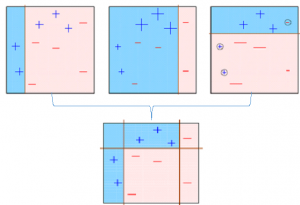

Thus, the boosting algorithm combines a number of weak learners to form a strong learner. The individual models would not perform well on the entire dataset, but they work well for some part of the dataset. Thus, each model actually boosts the performance of the ensemble.

# Algorithms based on Bagging and Boosting 

Bagging and Boosting are two of the most commonly used techniques in machine learning. In this section, we will look at them in detail. Following are the algorithms we will be focusing on:

Bagging algorithms:

- Bagging meta-estimator
- Random forest
- 
Boosting algorithms:

- AdaBoost
- GBM
- XGBM
- Light GBM
- CatBoost
For all the algorithms discussed in this section, we will follow this procedure:

Introduction to the algorithm
Sample code
Parameters

In [7]:
#importing important packages
import pandas as pd
import numpy as np

#reading the dataset
df=pd.read_csv("train_data.csv")

#filling missing values
df['Gender'].fillna('Male', inplace=True)

In [8]:
#split dataset into train and test

from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.3, random_state=0)

x_train=train.drop('Loan_Status',axis=1)
y_train=train['Loan_Status']

x_test=test.drop('Loan_Status',axis=1)
y_test=test['Loan_Status']

#create dummies
x_train=pd.get_dummies(x_train)
x_test=pd.get_dummies(x_test)

# 1. Bagging meta-estimator

Bagging meta-estimator is an ensembling algorithm that can be used for both classification (BaggingClassifier) and regression (BaggingRegressor) problems. It follows the typical bagging technique to make predictions. Following are the steps for the bagging meta-estimator algorithm:

1. Random subsets are created from the original dataset (Bootstrapping).
2. The subset of the dataset includes all features.
3. A user-specified base estimator is fitted on each of these smaller sets.
4. redictions from each model are combined to get the final result.

In [9]:
from sklearn.ensemble import BaggingClassifier
from sklearn import tree
model = BaggingClassifier(tree.DecisionTreeClassifier(random_state=1))
model.fit(x_train, y_train)
model.score(x_test,y_test)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Loan_ID_LP001002
- Loan_ID_LP001003
- Loan_ID_LP001013
- Loan_ID_LP001018
- Loan_ID_LP001024
- ...
Feature names seen at fit time, yet now missing:
- Loan_ID_LP001005
- Loan_ID_LP001006
- Loan_ID_LP001008
- Loan_ID_LP001011
- Loan_ID_LP001014
- ...
